<a id="Introduction"></a>
# Introduction

According to the National Heart, Lung and Blood Institute:

> Heart disease is a catch-all phrase for a variety of conditions that affect the heart’s structure and function. Coronary heart disease is a type of heart disease that develops when the arteries of the heart cannot deliver enough oxygen-rich blood to the heart. __It is the leading cause of death in the United States__.

(Emphasis by me. Source: https://www.nhlbi.nih.gov/health-topics/espanol/enfermedad-coronaria)

Also, according to the World Health Organization, cardiovascular diseases are the __leading cause of death globally__ (source:  https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)). 

In this notebook we try to learn enough information of this topic to understand the [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) dataset and build simple models to predict whether a patient has a disease or not based on features like the heart rate during exercise or the cholesterol levels in the blood.


In [1]:
library(corrplot)

corrplot 0.92 loaded



In [2]:
# Libraries
library(ggplot2)
library(tidyverse)

# Read the data
data <- read.csv('../input/heart-disease/heart.csv')



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [4]:
library('caTools')

In [5]:
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [6]:
# DISPLAY THE NUMBER OF ROWS AND COLUMNS
nrow(data)
ncol(data)
str(data)
summary(data)

[1] 303

[1] 14

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [7]:
# Deleting not related variables
data = subset(data, select = c(-thal,-ca))
# Converting the categorical data to R factors
data$sex <- as.factor(data$sex)
data$target <- as.factor(data$target)
data$cp <- as.factor(data$cp)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)

In [8]:
summary(data)

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:47.50   1:207   1: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :55.00           2: 87   Median :130.0   Median :240.0          
 Mean   :54.37           3: 23   Mean   :131.6   Mean   :246.3          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.5          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak     slope   target 
 0:147   Min.   : 71.0   0:204   Min.   :0.00   0: 21   0:138  
 1:152   1st Qu.:133.5   1: 99   1st Qu.:0.00   1:140   1:165  
 2:  4   Median :153.0           Median :0.80   2:142          
         Mean   :149.6           Mean   :1.04                  
         3rd Qu.:166.0           3rd Qu.:1.60                  
         Max.   :202.0           Max.   :6.20                  

To have a better views of what we are going to do, we will divide the value "age" into three goups.
One group will be the Young_age (<45)
the second will be the middle_age (45-55)
Finally the Old_age (>55)

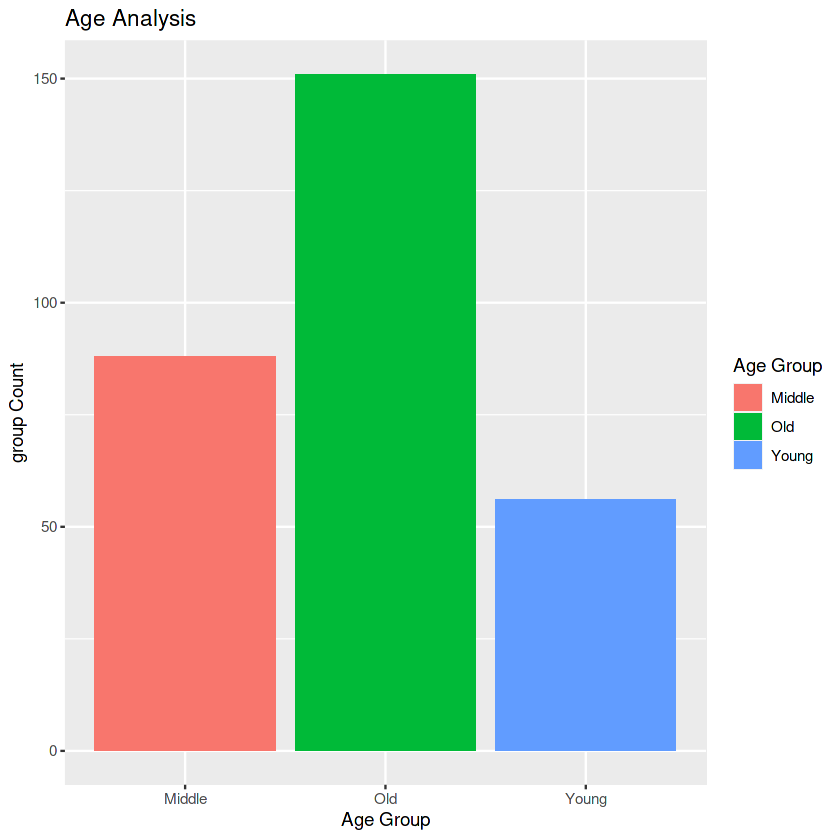

In [9]:
# Group the different ages in three groups (young, middle, old)
Young <- data[which((data$age<45)), ]
Middle <- data[which((data$age>=45)&(data$age<55)), ]
Old <- data[which(data$age>55), ]
groups <- data.frame(age_group = c("Young","Middle","Old"), group_count = c(NROW(Young$age), NROW(Middle$age), NROW(Old$age)))

#ploting different age groups
ggplot(groups, aes(x=age_group, y=group_count, fill=age_group)) + 
  ggtitle("Age Analysis") +
  xlab("Age Group")  +
  ylab("group Count") +
  geom_bar(stat="identity") +
  scale_fill_discrete(name = "Age Group", labels = c("Middle", "Old", "Young"))

As we can see on the graph above above a population of old people are the one who are more flexible to get or not heart disease. The younger population are the one who can get least heart disease base on thier population.
Also we cannot determine here who has disease or not. let's give a name for gender.

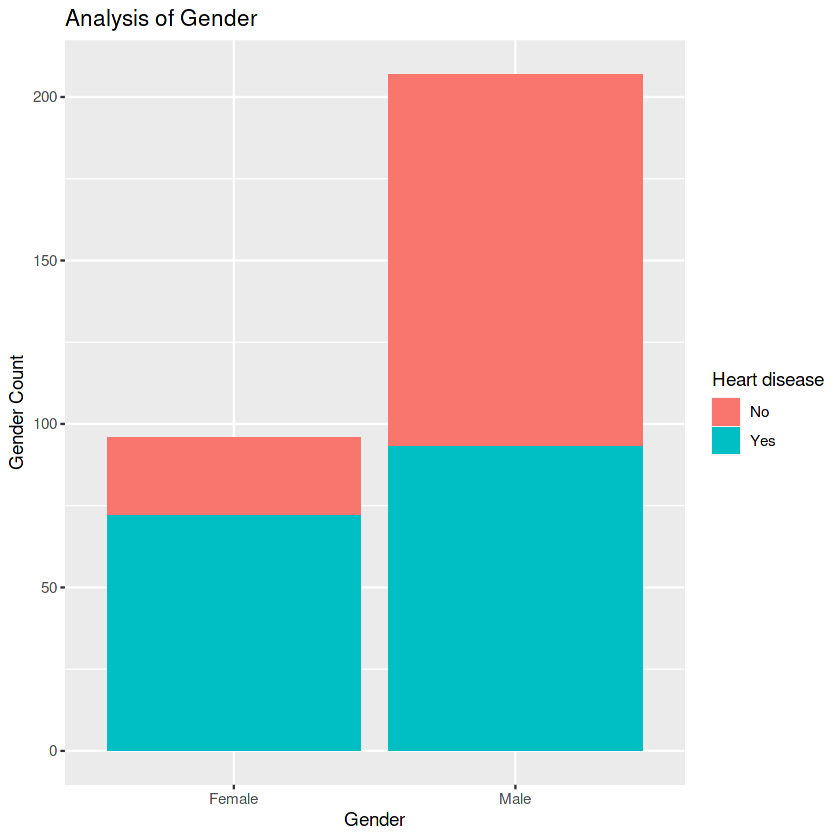

In [10]:
levels(data$sex) <- c("Female", "Male")
# Bar plot for sex
ggplot(data, aes(x= sex, fill= target)) + 
  geom_bar() +
  xlab("Gender") +
ylab("Gender Count") +
  ggtitle("Analysis of Gender") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))


On the graph above I wanted to divide the whole population by group of age (young, middle and old), and then divide each bar plot of those target population (young, middle and old) by sex or gender and state in each group the proportion of male and female. finally, find if each group have the disease.

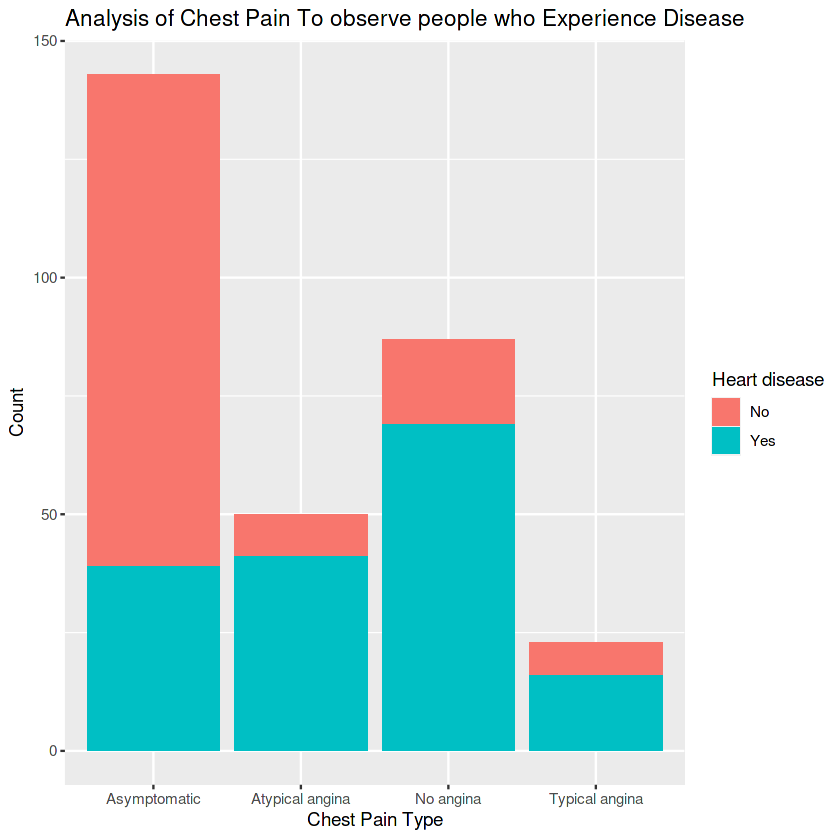

In [11]:
levels(data$cp) <- c("Asymptomatic", "Atypical angina", "No angina", "Typical angina")
# Bar plot for The chest pain ~ target
ggplot(data, aes(x= cp, fill=target)) + 
  geom_bar() +
  xlab("Chest Pain Type") +
  ylab("Count") +
  ggtitle("Analysis of Chest Pain To observe people who Experience Disease") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))

The graph above show the repartition of the chest pain type. As we can see the type of chest pain that are more subceptible to have disease is the No angina type. On the Asymptomatic type there is less people who got the diseas. But by proportion we can also see that Atypical angina, No angina and typical angina are the tree type which are great proportion of sick people compared to thier population.

# I am going to visualize on a circle bar plot each type of chest pain hearth disease symptome on male and female to have a better view of the proportion of people that are affected.

sex (1 = male; 0 = female); 
age in year;
 cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

cp,n
<fct>,<int>
Asymptomatic,143
Atypical angina,50
No angina,87
Typical angina,23


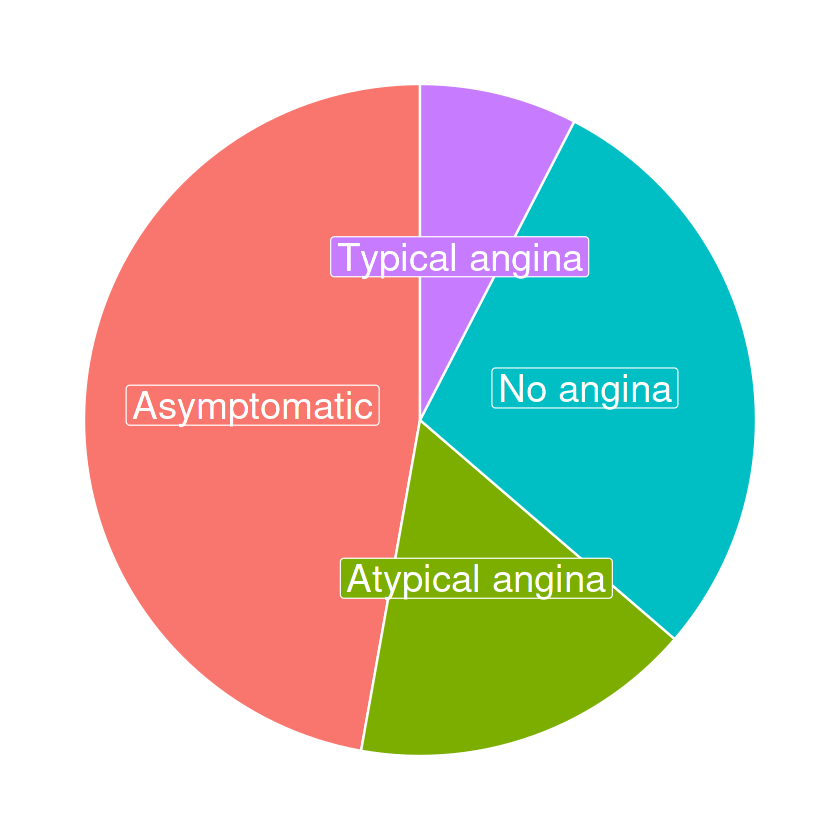

In [12]:
## 0 = "Asymptomatic", 1 = "Atypical angina", 2 = "No angina", 3 = "Typical angina"
data2 <- data %>% 
  arrange(desc(cp)) %>%
  mutate(prop = trestbps / sum(data$trestbps) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
# Basic piechart
data2 %>% 
  count(cp)
data3 <- data2 %>% count(cp) 
ggplot(data3, aes(x="", y=n , fill=cp)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="none") +
  geom_label(aes(label = cp),
             color = "white",size = 8,
             position = position_stack(vjust = 0.5),
             show.legend = FALSE)


On the this circle we can se that the great proportion of people who get symptom are the Asymptomatic.

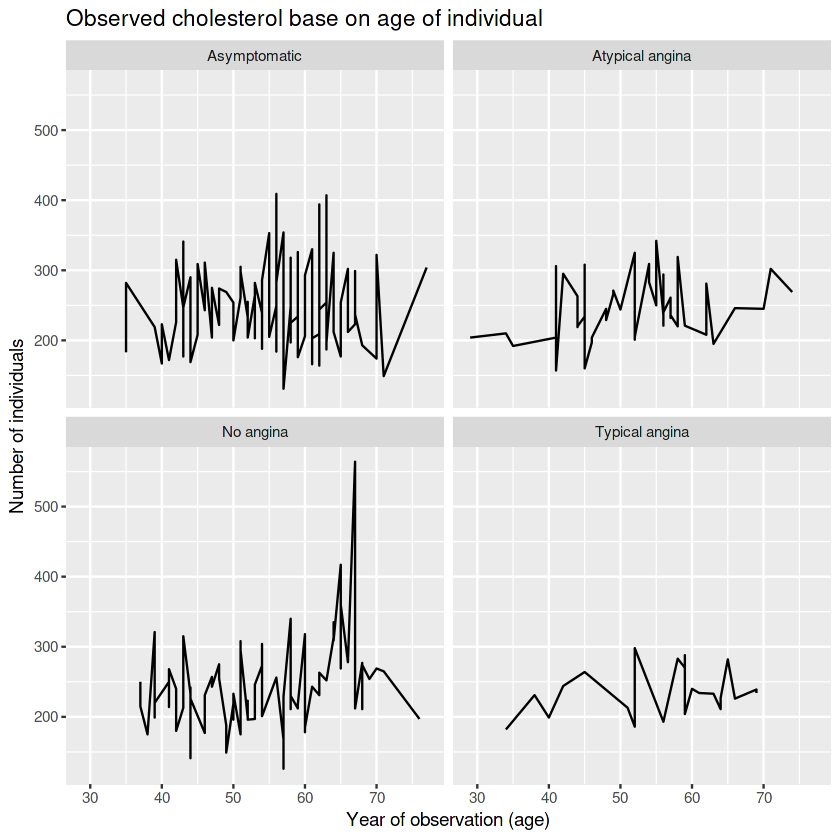

In [13]:
ggplot(data, aes(x = age, y = chol)) +
    geom_line() +
    facet_wrap(facets = vars(cp)) + 
    labs(title = "Observed cholesterol base on age of individual",
        x = "Year of observation (age)",
        y = "Number of individuals")

Now show on the graph for each type of chest pain symptom people who will be have higher cholesterol base on thier age. As we see for Asymptomatic people, the higher cholesterol is between the age of 55 to 65. For Atypical angina is at the age of 55. For No angina is between the age of 65 to 70. Finally for typical angina is between the age of 50 to 55.
**To conclude, people that with get much chest pain are found on the No angina group between the age of 65-70 with high cholesterol than other group peak.**